**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _EXPLAIN MACHINE LEARNING MODEL PREDICTIONS USING SHAP VALUES_. 🧠📊🔍**

This script demonstrates how to use **SHAP (SHapley Additive exPlanations)** to interpret a **binary classification model** by visualizing:

- **Global feature importance** (which features matter overall)
- **Local explanations** (why a specific prediction was made)

The implementation below uses the **stable, modern SHAP API** and handles **classification outputs correctly**.

---

## **📦 Import Required Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

---

## **🧩 Load Dataset & Train Model**

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **🔎 Initialise SHAP Explainer**

We use the **modern shap.Explainer**, which automatically adapts to the model type.

In [3]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

*⚠️ Since this is **binary classification** (samples, features, classes)*

---

## **📊 Global Feature Importance (SHAP Beeswarm Plot)**

We explain **class = 1** (positive class).

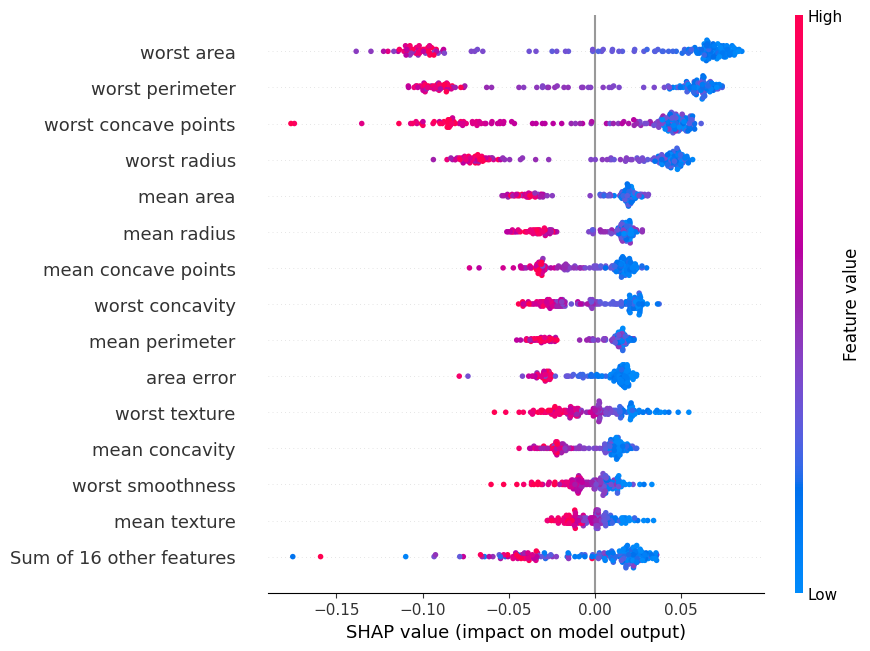

In [4]:
shap.plots.beeswarm(
    shap_values[:, :, 1],
    max_display=15
)

This plot shows:

- most influential features
- direction of impact (positive / negative)
- distribution across samples

---

## **🔍 Local Explanation (Single Prediction)**

Explain why the model made a prediction for one sample.

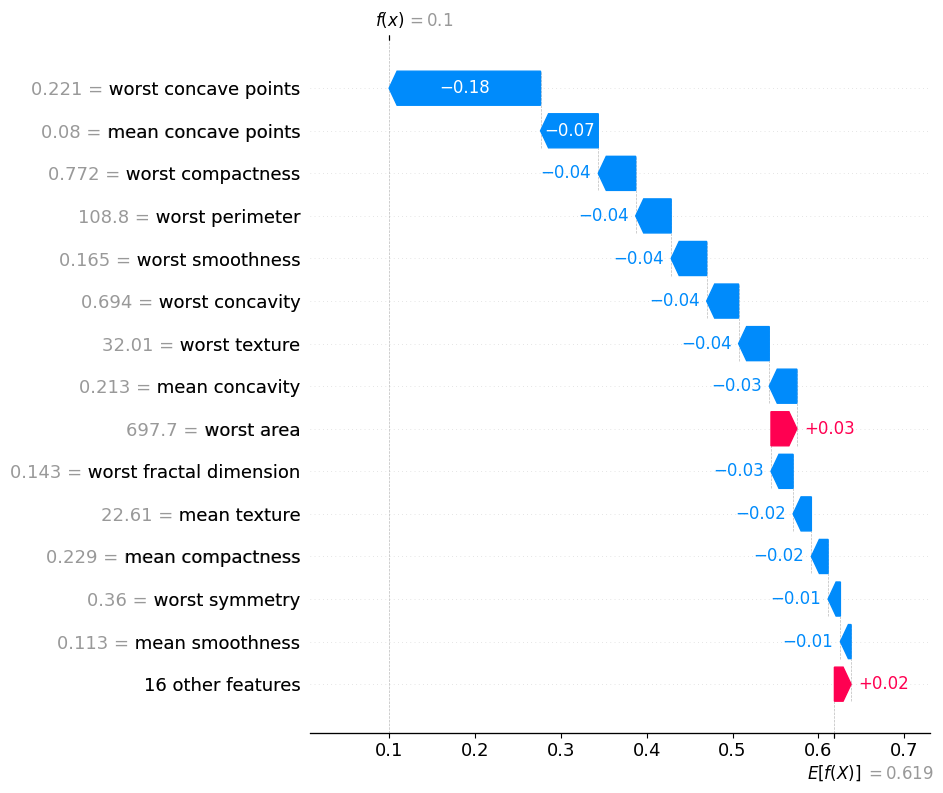

In [5]:
sample_index = 0

shap.plots.waterfall(
    shap_values[sample_index, :, 1],
    max_display=15
)

This visualizes how each feature pushed the prediction **towards or away** from the positive class.

---

## **🧠 Key Takeaways**

1. SHAP explains **why** a model makes predictions, not just what it predicts.
2. Classification models produce **multi-dimensional SHAP outputs**.
3. You must always **select a class** for visualization.
4. Beeswarm plots explain global behavior; waterfall plots explain individual decisions.
5. SHAP is essential for trust, debugging, and production ML systems.

---

## **Conclusion**

SHAP transforms black-box machine learning models into **interpretable systems**.

By correctly handling classification outputs and visualizing feature contributions, we gain transparency into model behavior — a critical requirement for real-world ML applications.

This completes the **AI with Python – Advanced Visualization & Interpretability** module.

---